In [219]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import itertools
import os, stat, time
from os.path import dirname as up
import shutil
import glob
from PIL import Image

In [220]:
from glob import glob
data = glob('/kaggle/input/breast-histopathology-images/**/*.png', recursive=True)

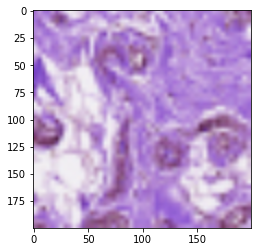

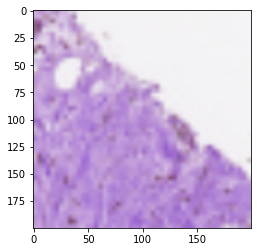

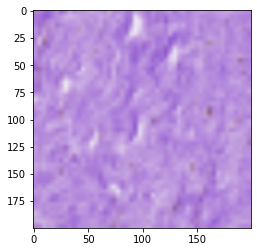

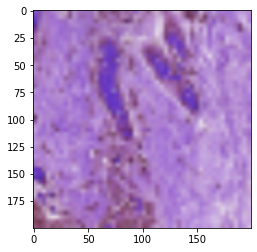

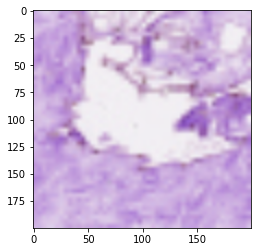

In [221]:
import cv2
import matplotlib.pyplot as plt
for i in data[:5]:
    img=cv2.imread(i)
    img_1=cv2.resize(img,(200,200))
    plt.imshow(img_1,cmap='binary')
    plt.show()

In [222]:
images=[]
labels=[]
for i in data[:1500]:
    if i.endswith('.png'):
        label=i[-5]
        img=cv2.imread(i)
        img_1=cv2.resize(img,(100,100))
        images.append(img_1)
        labels.append(label)

In [223]:
x=np.stack(images)

In [224]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(labels)

In [225]:
#normalize the data
x=x/255

In [226]:
#Setting seed
import tensorflow as tf
tf.random.set_seed(42)
tf.compat.v1.random.set_random_seed(42)

In [227]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [228]:
from tensorflow import keras
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers

from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

In [229]:
model = Sequential([
                    Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 100, 3)),
                    MaxPooling2D((2, 2)),
                    Flatten(),
                    Dense(100, activation = 'relu'),
                    Dense(2, activation = 'sigmoid')
])

In [230]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 76832)             0         
_________________________________________________________________
dense_36 (Dense)             (None, 100)               7683300   
_________________________________________________________________
dense_37 (Dense)             (None, 2)                 202       
Total params: 7,684,398
Trainable params: 7,684,398
Non-trainable params: 0
_________________________________________________________________


At first, we will try 3 different learning rates (0.001, 0.01, and 0.1) 

In [231]:
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['acc'])
history = model.fit(x,y,epochs=20,validation_split=0.4,batch_size=32)

Epoch 1/20
29/29 [==============================] - 1s 19ms/step - loss: 2.3683 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/20
29/29 [==============================] - 0s 9ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 3/20
29/29 [==============================] - 0s 8ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 4/20
29/29 [==============================] - 0s 9ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5/20
29/29 [==============================] - 0s 8ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6/20
29/29 [==============================] - 0s 8ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7/20
29/29 [==============================] - 0s 8ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8/20
29/29 [==============================] - 0s 8ms/st

In [232]:
# for learning_rate=0.001
loss,accuracy=model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.8059 - acc: 0.9500


In [233]:
opt = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['acc'])
history = model.fit(x,y,epochs=20,validation_split=0.4,batch_size=32)

Epoch 1/20
29/29 [==============================] - 1s 18ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/20
29/29 [==============================] - 0s 9ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 3/20
29/29 [==============================] - 0s 8ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 4/20
29/29 [==============================] - 0s 9ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5/20
29/29 [==============================] - 0s 8ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6/20
29/29 [==============================] - 0s 8ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7/20
29/29 [==============================] - 0s 8ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8/20
29/29 [==============================] - 0s 9ms/st

In [234]:
# for learning_rate=0.01
loss,accuracy=model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.8059 - acc: 0.9500


In [235]:
opt = Adam(learning_rate=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['acc'])
history = model.fit(x,y,epochs=20,validation_split=0.4,batch_size=32)

Epoch 1/20
29/29 [==============================] - 0s 15ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/20
29/29 [==============================] - 0s 8ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 3/20
29/29 [==============================] - 0s 9ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 4/20
29/29 [==============================] - 0s 8ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5/20
29/29 [==============================] - 0s 8ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6/20
29/29 [==============================] - 0s 8ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7/20
29/29 [==============================] - 0s 8ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8/20
29/29 [==============================] - 0s 8ms/st

In [236]:
# for learning_rate=0.1
loss,accuracy=model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.8059 - acc: 0.9500


We can see that 0.001, 0.01, and 0.1, all three learning rates give same accuracy and loss for test data

In [237]:
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['acc'])
history = model.fit(x,y,epochs=20,validation_split=0.4,batch_size=16)

Epoch 1/20
57/57 [==============================] - 1s 9ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/20
57/57 [==============================] - 0s 6ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 3/20
57/57 [==============================] - 0s 6ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 4/20
57/57 [==============================] - 0s 6ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5/20
57/57 [==============================] - 0s 6ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6/20
57/57 [==============================] - 0s 6ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7/20
57/57 [==============================] - 0s 6ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8/20
57/57 [==============================] - 0s 6ms/ste

In [238]:
# for batch size = 16, when learning_rate=0.001
loss,accuracy=model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.8059 - acc: 0.9500


In [239]:
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['acc'])
history = model.fit(x,y,epochs=20,validation_split=0.4,batch_size=32)

Epoch 1/20
29/29 [==============================] - 0s 15ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/20
29/29 [==============================] - 0s 8ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 3/20
29/29 [==============================] - 0s 8ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 4/20
29/29 [==============================] - 0s 8ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5/20
29/29 [==============================] - 0s 8ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6/20
29/29 [==============================] - 0s 9ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7/20
29/29 [==============================] - 0s 8ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8/20
29/29 [==============================] - 0s 8ms/st

In [240]:
# for batch size = 32, when learning_rate=0.001
loss,accuracy=model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.8059 - acc: 0.9500


In [241]:
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['acc'])
history = model.fit(x,y,epochs=20,validation_split=0.4,batch_size=64)

Epoch 1/20
15/15 [==============================] - 0s 32ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/20
15/15 [==============================] - 0s 16ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 3/20
15/15 [==============================] - 0s 16ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 4/20
15/15 [==============================] - 0s 13ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5/20
15/15 [==============================] - 0s 12ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6/20
15/15 [==============================] - 0s 12ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7/20
15/15 [==============================] - 0s 13ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8/20
15/15 [==============================] - 0s 

In [242]:
# for batch size = 64, when learning_rate=0.001
loss,accuracy=model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.8059 - acc: 0.9500


Again, for 3 different batch size (16,32,64), accuracy and loss on test data is same

Now, we will use learning rate = 0.01 and batch size = 32, and change the optimizer. Instead of adam, we will RMSprop

In [243]:
opt = RMSprop(learning_rate=0.001, epsilon=None, decay=0.0)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['acc'])
history = model.fit(x,y,epochs=20,validation_split=0.4,batch_size=64)

Epoch 1/20
15/15 [==============================] - 0s 32ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/20
15/15 [==============================] - 0s 14ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 3/20
15/15 [==============================] - 0s 14ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 4/20
15/15 [==============================] - 0s 14ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5/20
15/15 [==============================] - 0s 14ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6/20
15/15 [==============================] - 0s 14ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7/20
15/15 [==============================] - 0s 14ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8/20
15/15 [==============================] - 0s 

In [244]:
loss,accuracy=model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.8059 - acc: 0.9500


We can see that loss and accuracy is same on test data. We have decided to go with learning rate = 0.01, batch size = 32, optimizer = Adam for final basic CNN model

In [245]:
#Final basic CNN model
opt = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['acc'])
history = model.fit(x,y,epochs=20,validation_split=0.4,batch_size=32)

Epoch 1/20
29/29 [==============================] - 0s 15ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/20
29/29 [==============================] - 0s 12ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 3/20
29/29 [==============================] - 0s 10ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 4/20
29/29 [==============================] - 0s 9ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5/20
29/29 [==============================] - 0s 8ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6/20
29/29 [==============================] - 0s 8ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7/20
29/29 [==============================] - 0s 8ms/step - loss: 2.3998 - acc: 0.8511 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8/20
29/29 [==============================] - 0s 8ms/

In [246]:
#Final basic CNN model's performance
loss,accuracy=model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.8059 - acc: 0.9500


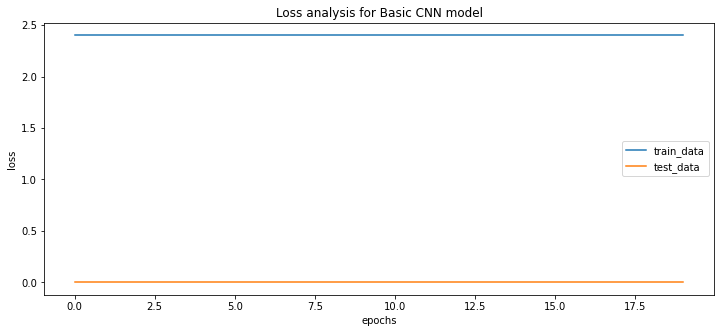

In [247]:
#Plot loss for different epochs
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_data','test_data'])
plt.title('Loss analysis for Basic CNN model')
plt.show()

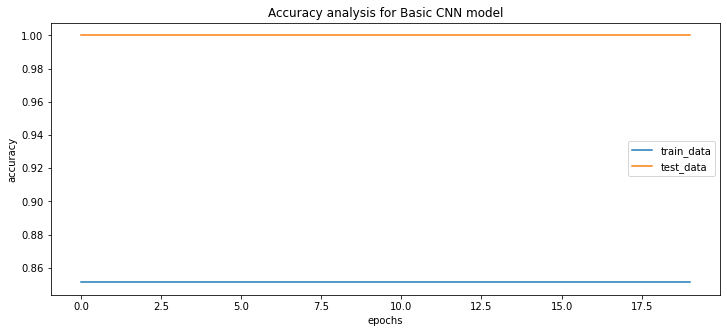

In [248]:
#Plot accuracy for different epochs
plt.figure(figsize=(12,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_data','test_data'])
plt.title('Accuracy analysis for Basic CNN model')
plt.show()


Lenet model

At first, we will try 3 different learning rates (0.001, 0.01, and 0.1) 

In [249]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=x_train[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C5
    keras.layers.Flatten(), #Flatten    
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(2, activation='sigmoid') #Output layer
])

In [250]:
lenet_5_model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 100, 100, 6)       456       
_________________________________________________________________
average_pooling2d_22 (Averag (None, 50, 50, 6)         0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 46, 46, 16)        2416      
_________________________________________________________________
average_pooling2d_23 (Averag (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 19, 19, 120)       48120     
_________________________________________________________________
flatten_19 (Flatten)         (None, 43320)             0         
_________________________________________________________________
dense_38 (Dense)             (None, 84)              

In [251]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=x_train[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C5
    keras.layers.Flatten(), #Flatten    
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(2, activation='sigmoid') #Output layer
])
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
lenet_5_model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['acc'])
history=lenet_5_model.fit(x,y,epochs=20,validation_split=0.4,batch_size=32)

Epoch 1/20
29/29 [==============================] - 0s 16ms/step - loss: 0.8956 - acc: 0.8244 - val_loss: 0.6844 - val_acc: 1.0000
Epoch 2/20
29/29 [==============================] - 0s 9ms/step - loss: 0.6863 - acc: 0.8511 - val_loss: 0.6818 - val_acc: 1.0000
Epoch 3/20
29/29 [==============================] - 0s 9ms/step - loss: 0.6833 - acc: 0.8511 - val_loss: 0.6746 - val_acc: 1.0000
Epoch 4/20
29/29 [==============================] - 0s 9ms/step - loss: 0.6737 - acc: 0.8511 - val_loss: 0.6445 - val_acc: 1.0000
Epoch 5/20
29/29 [==============================] - 0s 9ms/step - loss: 0.5925 - acc: 0.8511 - val_loss: 0.2876 - val_acc: 1.0000
Epoch 6/20
29/29 [==============================] - 0s 9ms/step - loss: 0.4275 - acc: 0.8511 - val_loss: 0.1362 - val_acc: 1.0000
Epoch 7/20
29/29 [==============================] - 0s 9ms/step - loss: 0.4272 - acc: 0.8511 - val_loss: 0.1880 - val_acc: 1.0000
Epoch 8/20
29/29 [==============================] - 0s 9ms/step - loss: 0.4217 - acc: 0.8

In [252]:
# for learning_rate=0.001
loss,accuracy=lenet_5_model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.2412 - acc: 0.9500


In [253]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=x_train[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C5
    keras.layers.Flatten(), #Flatten    
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(2, activation='sigmoid') #Output layer
])
opt = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
lenet_5_model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['acc'])
history=lenet_5_model.fit(x,y,epochs=20,validation_split=0.4,batch_size=32)

Epoch 1/20
29/29 [==============================] - 0s 16ms/step - loss: 0.7593 - acc: 0.7856 - val_loss: 0.1694 - val_acc: 1.0000
Epoch 2/20
29/29 [==============================] - 0s 9ms/step - loss: 0.4259 - acc: 0.8511 - val_loss: 0.2011 - val_acc: 1.0000
Epoch 3/20
29/29 [==============================] - 0s 9ms/step - loss: 0.4226 - acc: 0.8511 - val_loss: 0.1861 - val_acc: 1.0000
Epoch 4/20
29/29 [==============================] - 0s 9ms/step - loss: 0.4502 - acc: 0.8511 - val_loss: 0.0889 - val_acc: 1.0000
Epoch 5/20
29/29 [==============================] - 0s 9ms/step - loss: 0.4478 - acc: 0.8511 - val_loss: 0.0709 - val_acc: 1.0000
Epoch 6/20
29/29 [==============================] - 0s 9ms/step - loss: 0.4334 - acc: 0.8511 - val_loss: 0.1466 - val_acc: 1.0000
Epoch 7/20
29/29 [==============================] - 0s 9ms/step - loss: 0.4250 - acc: 0.8511 - val_loss: 0.1218 - val_acc: 1.0000
Epoch 8/20
29/29 [==============================] - 0s 9ms/step - loss: 0.4274 - acc: 0.8

In [254]:
# for learning_rate=0.01
loss,accuracy=lenet_5_model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.2449 - acc: 0.9500


In [255]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=x_train[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C5
    keras.layers.Flatten(), #Flatten    
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(2, activation='sigmoid') #Output layer
])
opt = Adam(learning_rate=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
lenet_5_model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['acc'])
history=lenet_5_model.fit(x,y,epochs=20,validation_split=0.4,batch_size=32)

Epoch 1/20
29/29 [==============================] - 0s 16ms/step - loss: 0.7512 - acc: 0.4800 - val_loss: 0.0996 - val_acc: 1.0000
Epoch 2/20
29/29 [==============================] - 0s 9ms/step - loss: 0.6343 - acc: 0.8044 - val_loss: 2.2044e-04 - val_acc: 1.0000
Epoch 3/20
29/29 [==============================] - 0s 9ms/step - loss: 0.7358 - acc: 0.7467 - val_loss: 0.0107 - val_acc: 1.0000
Epoch 4/20
29/29 [==============================] - 0s 9ms/step - loss: 1.0761 - acc: 0.7333 - val_loss: 1.2279e-04 - val_acc: 1.0000
Epoch 5/20
29/29 [==============================] - 0s 9ms/step - loss: 0.6207 - acc: 0.7667 - val_loss: 0.0168 - val_acc: 1.0000
Epoch 6/20
29/29 [==============================] - 0s 9ms/step - loss: 0.7353 - acc: 0.7444 - val_loss: 0.4965 - val_acc: 1.0000
Epoch 7/20
29/29 [==============================] - 0s 9ms/step - loss: 0.5339 - acc: 0.8311 - val_loss: 0.3046 - val_acc: 1.0000
Epoch 8/20
29/29 [==============================] - 0s 9ms/step - loss: 0.7093 - 

In [256]:
# for learning_rate=0.1
loss,accuracy=lenet_5_model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.8059 - acc: 0.9500


We can see that 0.001 learning rates gives best loss for test data. In terms of accuracy, all were same

Now,we will try 3 different batch sizes (16,32,64)

In [257]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=x_train[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C5
    keras.layers.Flatten(), #Flatten    
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(2, activation='sigmoid') #Output layer
])
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
lenet_5_model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['acc'])
history=lenet_5_model.fit(x,y,epochs=20,validation_split=0.4,batch_size=16)

Epoch 1/20
57/57 [==============================] - 1s 12ms/step - loss: 0.9472 - acc: 0.8511 - val_loss: 0.0377 - val_acc: 1.0000
Epoch 2/20
57/57 [==============================] - 0s 7ms/step - loss: 0.4388 - acc: 0.8511 - val_loss: 0.1805 - val_acc: 1.0000
Epoch 3/20
57/57 [==============================] - 0s 7ms/step - loss: 0.4234 - acc: 0.8511 - val_loss: 0.1936 - val_acc: 1.0000
Epoch 4/20
57/57 [==============================] - 0s 7ms/step - loss: 0.4329 - acc: 0.8511 - val_loss: 0.1622 - val_acc: 1.0000
Epoch 5/20
57/57 [==============================] - 0s 7ms/step - loss: 0.4262 - acc: 0.8511 - val_loss: 0.1080 - val_acc: 1.0000
Epoch 6/20
57/57 [==============================] - 0s 7ms/step - loss: 0.4264 - acc: 0.8511 - val_loss: 0.1341 - val_acc: 1.0000
Epoch 7/20
57/57 [==============================] - 0s 7ms/step - loss: 0.4242 - acc: 0.8511 - val_loss: 0.1557 - val_acc: 1.0000
Epoch 8/20
57/57 [==============================] - 0s 7ms/step - loss: 0.4244 - acc: 0.8

In [258]:
# for batch size = 16, when learning_rate=0.001
loss,accuracy=lenet_5_model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.2395 - acc: 0.9500


In [259]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=x_train[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C5
    keras.layers.Flatten(), #Flatten    
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(2, activation='sigmoid') #Output layer
])
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
lenet_5_model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['acc'])
history=lenet_5_model.fit(x,y,epochs=20,validation_split=0.4,batch_size=32)

Epoch 1/20
29/29 [==============================] - 0s 16ms/step - loss: 0.7941 - acc: 0.7711 - val_loss: 0.1581 - val_acc: 1.0000
Epoch 2/20
29/29 [==============================] - 0s 9ms/step - loss: 0.4214 - acc: 0.8511 - val_loss: 0.1613 - val_acc: 1.0000
Epoch 3/20
29/29 [==============================] - 0s 9ms/step - loss: 0.4213 - acc: 0.8511 - val_loss: 0.1586 - val_acc: 1.0000
Epoch 4/20
29/29 [==============================] - 0s 9ms/step - loss: 0.4232 - acc: 0.8511 - val_loss: 0.1791 - val_acc: 1.0000
Epoch 5/20
29/29 [==============================] - 0s 9ms/step - loss: 0.4218 - acc: 0.8511 - val_loss: 0.1585 - val_acc: 1.0000
Epoch 6/20
29/29 [==============================] - 0s 9ms/step - loss: 0.4220 - acc: 0.8511 - val_loss: 0.1551 - val_acc: 1.0000
Epoch 7/20
29/29 [==============================] - 0s 9ms/step - loss: 0.4216 - acc: 0.8511 - val_loss: 0.1679 - val_acc: 1.0000
Epoch 8/20
29/29 [==============================] - 0s 9ms/step - loss: 0.4215 - acc: 0.8

In [260]:
# for batch size = 32, when learning_rate=0.001
loss,accuracy=lenet_5_model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.2416 - acc: 0.9500


In [261]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=x_train[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C5
    keras.layers.Flatten(), #Flatten    
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(2, activation='sigmoid') #Output layer
])
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
lenet_5_model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['acc'])
history=lenet_5_model.fit(x,y,epochs=20,validation_split=0.4,batch_size=64)

Epoch 1/20
15/15 [==============================] - 0s 27ms/step - loss: 1.2923 - acc: 0.8511 - val_loss: 2.6861e-04 - val_acc: 1.0000
Epoch 2/20
15/15 [==============================] - 0s 15ms/step - loss: 1.1475 - acc: 0.8511 - val_loss: 8.9101e-04 - val_acc: 1.0000
Epoch 3/20
15/15 [==============================] - 0s 15ms/step - loss: 0.9702 - acc: 0.8511 - val_loss: 0.0030 - val_acc: 1.0000
Epoch 4/20
15/15 [==============================] - 0s 14ms/step - loss: 0.7855 - acc: 0.8511 - val_loss: 0.0100 - val_acc: 1.0000
Epoch 5/20
15/15 [==============================] - 0s 14ms/step - loss: 0.6315 - acc: 0.8511 - val_loss: 0.0307 - val_acc: 1.0000
Epoch 6/20
15/15 [==============================] - 0s 15ms/step - loss: 0.5044 - acc: 0.8511 - val_loss: 0.0727 - val_acc: 1.0000
Epoch 7/20
15/15 [==============================] - 0s 14ms/step - loss: 0.4397 - acc: 0.8511 - val_loss: 0.1256 - val_acc: 1.0000
Epoch 8/20
15/15 [==============================] - 0s 14ms/step - loss: 0.

In [262]:
# for batch size = 64, when learning_rate=0.001
loss,accuracy=lenet_5_model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.2392 - acc: 0.9500


Here, for 3 different batch size (16,32,64), accuracy and loss on test data is same

Now, we will use learning rate = 0.001 (it gave best loss) and batch size = 32 (since 3 different batch sizes gave same result, we chose one), and change the optimizer. Instead of adam, we will RMSprop

In [263]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=x_train[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C5
    keras.layers.Flatten(), #Flatten    
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(2, activation='sigmoid') #Output layer
])
opt = RMSprop(learning_rate=0.001, epsilon=None, decay=0.0)
lenet_5_model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['acc'])
history=lenet_5_model.fit(x,y,epochs=20,validation_split=0.4,batch_size=32)

Epoch 1/20
29/29 [==============================] - 0s 17ms/step - loss: 0.9697 - acc: 0.8511 - val_loss: 0.0053 - val_acc: 1.0000
Epoch 2/20
29/29 [==============================] - 0s 10ms/step - loss: 0.6173 - acc: 0.8511 - val_loss: 0.0702 - val_acc: 1.0000
Epoch 3/20
29/29 [==============================] - 0s 9ms/step - loss: 0.4296 - acc: 0.8511 - val_loss: 0.1898 - val_acc: 1.0000
Epoch 4/20
29/29 [==============================] - 0s 10ms/step - loss: 0.4208 - acc: 0.8511 - val_loss: 0.1388 - val_acc: 1.0000
Epoch 5/20
29/29 [==============================] - 0s 9ms/step - loss: 0.4236 - acc: 0.8511 - val_loss: 0.1127 - val_acc: 1.0000
Epoch 6/20
29/29 [==============================] - 0s 9ms/step - loss: 0.4254 - acc: 0.8511 - val_loss: 0.1301 - val_acc: 1.0000
Epoch 7/20
29/29 [==============================] - 0s 10ms/step - loss: 0.4235 - acc: 0.8511 - val_loss: 0.1836 - val_acc: 1.0000
Epoch 8/20
29/29 [==============================] - 0s 9ms/step - loss: 0.4244 - acc: 

In [264]:
loss,accuracy=lenet_5_model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.2398 - acc: 0.9500


We can see that accuracy is same on test data for both optimizer. But loss was smaller for RMSprop. Thus, we have decided to go with learning rate = 0.01, batch size = 32, optimizer = RMSprop for final Lenet CNN model

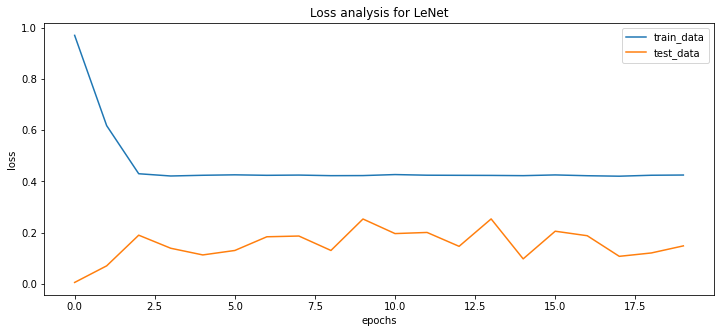

In [265]:
#Plot loss for different epochs
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_data','test_data'])
plt.title('Loss analysis for LeNet')
plt.show()

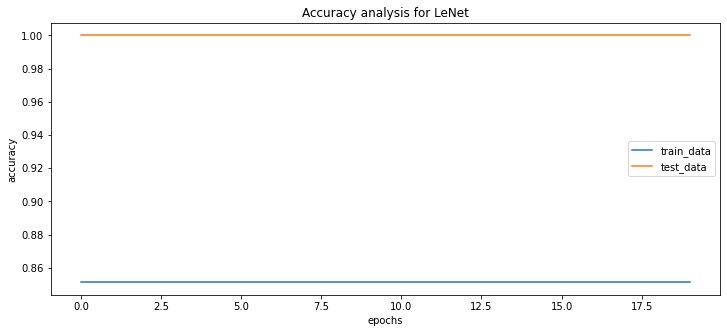

In [266]:
#Plot accuracy for different epochs
plt.figure(figsize=(12,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_data','test_data'])
plt.title('Accuracy analysis for LeNet')
plt.show()